   **Musk/Non-musk Task**

**Importing Important Library**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/chemical-compound/musk_csv.csv


**Data Preprocessing**

In [2]:
data = pd.read_csv('../input/chemical-compound/musk_csv.csv')
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
data.count()

ID                   6598
molecule_name        6598
conformation_name    6598
f1                   6598
f2                   6598
                     ... 
f163                 6598
f164                 6598
f165                 6598
f166                 6598
class                6598
Length: 170, dtype: int64

In [4]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [5]:
data.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

In [6]:
new_data=data.copy()

In [7]:
new_data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


**Since ID, molecule_name and conformation_name are the features which does not affect the classification and therefore can be drop to improve the accuracy of the model**

In [8]:
new_data.drop(['molecule_name','conformation_name','ID'],axis=1,inplace=True)

**Checking if any data is missing/null**

In [9]:
new_data.isnull().values.any()

False

**Splitting data into training and test dataset in ratio 80:20**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(new_data, new_data['class'], test_size = 0.20,random_state=120)

**Importing and using Keras model because Keras is an Open Source Neural Network library written in Python that runs on top of Theano or Tensorflow. It is designed to be modular, fast and easy to use.Keras doesn't handle low-level computation. Instead, it uses another library to do it, called the "Backend. So Keras is high-level API wrapper for the low-level API, capable of running on top of TensorFlow, CNTK, or Theano.Keras High-Level API handles the way we make models, defining layers, or set up multiple input-output models. In this level, Keras also compiles our model with loss and optimizer functions, training process with fit function.**

In [12]:
import keras
from keras.models import Model
from keras.layers import *

Using TensorFlow backend.


In [13]:
print(X_train.shape)
print(X_test.shape)

(5278, 167)
(1320, 167)


In [14]:
Inp=Input(shape=(167,))
x=Dense(500,activation='sigmoid',name='Hidden_layer1')(Inp)
x=Dense(300,activation='relu',name='Hidden_layer2')(x)
x=Dense(155,activation='sigmoid',name='Hidden_layer3')(x)
x=Dense(80,activation='relu',name='Hidden_layer4')(x)
output=Dense(1,activation='sigmoid',name='Output_layer')(x)

In [15]:
model=Model(Inp,output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 167)               0         
_________________________________________________________________
Hidden_layer1 (Dense)        (None, 500)               84000     
_________________________________________________________________
Hidden_layer2 (Dense)        (None, 300)               150300    
_________________________________________________________________
Hidden_layer3 (Dense)        (None, 155)               46655     
_________________________________________________________________
Hidden_layer4 (Dense)        (None, 80)                12480     
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 81        
Total params: 293,516
Trainable params: 293,516
Non-trainable params: 0
_____________________________________________________

**Importing optimizers from keras for optimization**

In [16]:
from keras import optimizers

In [17]:
l_rate=0.00001
training_epoch=50
batch_size=700
adma=optimizers.adam(lr=l_rate)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Fitting and training keras model on training dataset**

In [19]:
op=model.fit(X_train,Y_train,batch_size=batch_size,epochs=training_epoch,verbose=2,validation_data=(X_test,Y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/50
 - 1s - loss: 0.5043 - accuracy: 0.7531 - val_loss: 0.4034 - val_accuracy: 0.8485
Epoch 2/50
 - 0s - loss: 0.3978 - accuracy: 0.8452 - val_loss: 0.3667 - val_accuracy: 0.8485
Epoch 3/50
 - 0s - loss: 0.3523 - accuracy: 0.8458 - val_loss: 0.3183 - val_accuracy: 0.8826
Epoch 4/50
 - 0s - loss: 0.2821 - accuracy: 0.8947 - val_loss: 0.2403 - val_accuracy: 0.9258
Epoch 5/50
 - 0s - loss: 0.2032 - accuracy: 0.9335 - val_loss: 0.1805 - val_accuracy: 0.9356
Epoch 6/50
 - 0s - loss: 0.1489 - accuracy: 0.9490 - val_loss: 0.1449 - val_accuracy: 0.9439
Epoch 7/50
 - 0s - loss: 0.1199 - accuracy: 0.9589 - val_loss: 0.1343 - val_accuracy: 0.9485
Epoch 8/50
 - 0s - loss: 0.0963 - accuracy: 0.9680 - val_loss: 0.1212 - val_accuracy: 0.9598
Epoch 9/50
 - 0s - loss: 0.0943 - accuracy: 0.9653 - val_loss: 0.1056 - val_accuracy: 0.9568
Epoch 10/50
 - 0s - loss: 0.0841 - accuracy: 0.9706 - val_loss: 0.1232 - val_accuracy: 0.9576
Epoch 11/50
 - 0s - l

In [20]:
print(op.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


**Loss curve for training and test dataset**

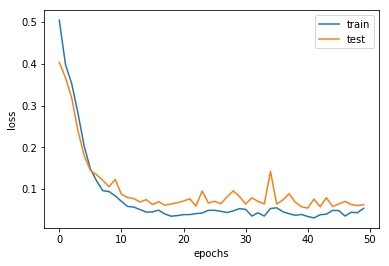

In [21]:
plt.plot(op.history['loss'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_loss'],label='test')
plt.ylabel('loss')
plt.legend()
plt.show()

**Accuracy curve for training and test dataset**

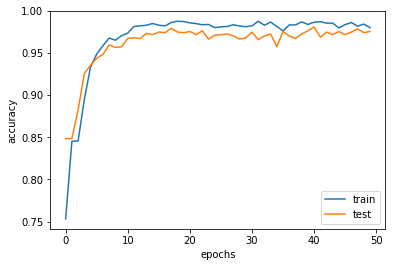

In [22]:
plt.plot(op.history['accuracy'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_accuracy'],label='test')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Prediction on test dataset**

In [23]:
Y_pred=model.predict(X_test).astype('int').flatten()
print(Y_pred)

[0 0 0 ... 0 0 0]


**Final performance measures of our model including validation accuracy, loss, precision, recall, F1 score.**

In [24]:
from sklearn.metrics import classification_report
cls = classification_report(Y_test,Y_pred)
print(cls)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1120
           1       0.00      0.00      0.00       200

    accuracy                           0.85      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.72      0.85      0.78      1320



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**THANK YOU**